# CIFAR Images classification using CNN

CIFAR-10 的全名是 ``Canadian Institute for Advanced Research``。  
它是深度學習的大神 Geoffrey Hinton 以及 Alex Krizhevsky 和 Vinod Nair 共同創建出來的。  

CIFAR-10 是個知名的資料集，其包含了 60,000 張彩色 $32\times32$ 的圖片。  
圖片集共分成 10 個類別，每種類別有 6,000 張照片。  
其中 50,000 張做為訓練集，10,000 做為測試集。

這 10 類的類別為 飛機、汽車、鳥、貓、鹿、狗、青蛙、馬、船、卡車。

![](https://img-blog.csdn.net/20180717104127164?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2JyeWFudF9tZW5n/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)

The CIFAR-10 dataset The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

For the details of the CIFAR-10 dataset, please refer to [here](https://www.cs.toronto.edu/~kriz/cifar.html).

底下我們先把所要的套件全都先載入

In [0]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Gloabl setting

在這兒我們把程式碼中共同的參數都列上

In [0]:
EPOCHS = 200
INPUT_IMG_SHAPE = (32, 32, 3)
CLASSES = 10
BATCH_SIZE = 128
LEARN_RATE = 0.001
L2=0.001

## Load the dataset

CIFAR-10 已經直接包含在 Keras 的資料集中了，我們可以直接載入它。

We can directly load the CIFAR-10 dataset as it is included in the Keras.

In [0]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


## Observe the dataset

In [0]:
print(f'The shape of x_train is {x_train.shape}')
print(f'The shape of y_train is {y_train.shape}')

The shape of x_train is (50000, 32, 32, 3)
The shape of y_train is (50000, 1)


x_train contains 50000 $32 \times 32$ colorful images.  

3 means 3 channels (i.g., R, G and B).

## Show the images in the dataset

In [0]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Each image is a $32 \times 32$ colorful (i.e., 3 channels) picture.

![](cnn_channels.png)

Show the first image of x_train.

It is a frog. 

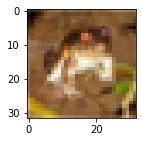

In [0]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

Print the lable of x_train[0]. 

In [0]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
i_img = 1 
print(y_train[i_img])
v = y_train[i_img][0]
print(f'The class of x_train[{i_img}] is a {labelNames[v]}')

[9]
The class of x_train[1] is a truck


## Normalization of the dataset

In [0]:
x_train1 = x_train.astype('float32') #cast to float32 datatype
x_test1 = x_test.astype('float32') #cast to float32 datatype
x_train1 = x_train1/255
x_test1 = x_test1/255

## Conver a label to a probability vector

In [0]:

y_train1 = to_categorical(y_train, CLASSES)
y_test1 = to_categorical(y_test, CLASSES) 

In [0]:
print(y_train1[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Construct the CNN

In [0]:
#the shape of each image
INPUT_IMG_SHAPE = (32, 32, 3)
CLASSES = 10

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=INPUT_IMG_SHAPE,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(CLASSES,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
h = model.fit(x_train1, y_train1, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

In [0]:
dfResult = pd.DataFrame(h.history)
dfResult.head()

,loss,accuracy,val_loss,val_accuracy
0,1.563811,0.436750,1.357954,0.5155
1,1.187166,0.578100,1.163770,0.5870
2,1.032653,0.635675,1.118399,0.6007
3,0.917692,0.679700,1.013944,0.6438
4,0.808031,0.715250,0.957274,0.6656


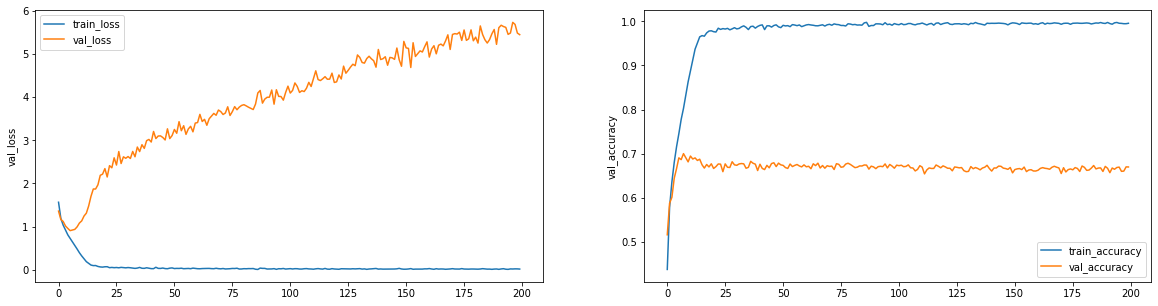

In [0]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=dfResult.loss, label='train_loss')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_loss, label='val_loss')
plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=dfResult.accuracy, label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_accuracy, label='val_accuracy')

In [0]:
print(f'The best val_accuracy is: {dfResult.val_accuracy.max()}')

The best val_accuracy is: 0.699400007724762


由上面的圖片可以看出，我們的模型已經進入了 overfitting 的狀況。

## The best result on CIFAR-10

Check [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130) to see the leaderboard of the training results on CIFAR-10.

![](https://i.imgur.com/AVCUycV.png)

## Early Stopping



In [0]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy',  # monitor val_accuracy
                   patience=15,   #若 15 個 EPOCHs 都沒有改善，就停止 
                   verbose=1)

mc = ModelCheckpoint(filepath='weights.{epoch:02d}-{val_accuracy:.2f}.h5', save_best_only=True, verbose=1, monitor='val_accuracy')

h = model.fit(x_train1, y_train1, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[es, mc])

In [0]:
dfResult = pd.DataFrame(h.history)
dfResult.head()
dfResult.val_accuracy.max()

0.6753000020980835

### Load Model

底下我們載入最佳的模型，並分析結果。

底下程式碼中 load_model(檔名) 的檔名請自行選擇。


In [0]:
from tensorflow.keras.models import load_model
model_old = load_model('weights.23-0.68.h5')
eloss, eacc = model_old.evaluate(x_test1, y_test1)
print(f'LOSS (test): {eloss:.3f}')
print(f'Accuracy (test): {eacc:.3f}')

313/313 [==============================] - 2s 5ms/step - loss: 8.3382 - accuracy: 0.6687
LOSS (test): 8.338
Accuracy (test): 0.669


## 使用設計好的模型來跑 CIFAR-10 

我們模仿 VGG 卷積模型來分析 CIFAR-10 資料集，看是否能進一步提升效能。

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. 

You can visit [here](https://arxiv.org/abs/1409.1556) to access the original paper of VGG16. 

In [0]:
modelvgg = Sequential()
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_IMG_SHAPE))
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Flatten())
modelvgg.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelvgg.add(Dense(10, activation='softmax'))
modelvgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)        

In [0]:
opt = Adam(lr=LEARN_RATE)
modelvgg.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:

h = modelvgg.fit(x_train1, y_train1, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

In [0]:
dfResult = pd.DataFrame(h.history)
dfResult.head()

,loss,accuracy,val_loss,val_accuracy
0,1.678148,0.378150,1.378258,0.4981
1,1.205379,0.566775,1.064462,0.6215
2,0.953908,0.661525,0.936139,0.6688
3,0.800747,0.718900,0.837673,0.7136
4,0.682896,0.760800,0.805940,0.7226


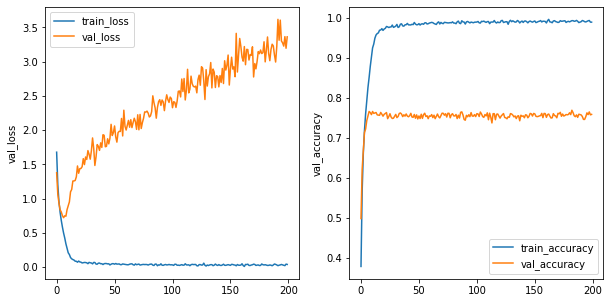

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=dfResult.loss, label='train_loss')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_loss, label='val_loss')
plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=dfResult.accuracy, label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_accuracy, label='val_accuracy')

可以看出 VGG 的模仿品一樣有 overfitting 的問題。

但由底下的分析也可以看出來， VGG 的模仿品有較高的 accuracy (76%). 

In [0]:
print(f'The best val_accuracy is: {dfResult.val_accuracy.max()}')
print(f'The best train_accuracy is: {dfResult.accuracy.max()}')

The best val_accuracy is: 0.7692999839782715
The best train_accuracy is: 0.9969000220298767


In [0]:
eloss, eacc = modelvgg.evaluate(x_test1, y_test1)
print(f'Loss(test): {eloss}')
print(f'Accuracy(test): {eacc}')

313/313 [==============================] - 1s 3ms/step - loss: 3.4261 - accuracy: 0.7530
Loss(test): 3.4261374473571777
Accuracy(test): 0.753000020980835


## L2 Regularization

底下在 VGG 的模仿品上，疊加 L2 regularization 的效果，看對於 overfitting 有什麼影響

In [0]:
modelvgg = Sequential()
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_IMG_SHAPE, kernel_regularizer=l2(0.01)))
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Flatten())
modelvgg.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelvgg.add(Dense(10, activation='softmax'))
modelvgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)        

In [0]:
opt = Adam(lr=LEARN_RATE)
modelvgg.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
h = modelvgg.fit(x_train1, y_train1, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

In [0]:
dfResult = pd.DataFrame(h.history)
dfResult.head()

,loss,accuracy,val_loss,val_accuracy
0,2.323596,0.266825,1.925311,0.3149
1,1.835025,0.363650,1.715379,0.4109
2,1.703264,0.420500,1.681762,0.4347
3,1.612208,0.458800,1.582525,0.4769
4,1.547063,0.484850,1.503635,0.5095


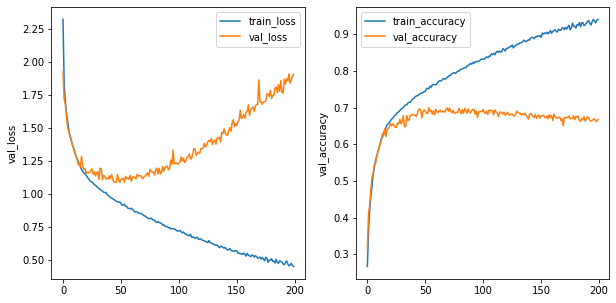

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=dfResult.loss, label='train_loss')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_loss, label='val_loss')
plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=dfResult.accuracy, label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_accuracy, label='val_accuracy')

可以看出 overfitting 一樣是發生了 (不過發生得比較晚)

同時可以觀察到 L2 regularization 影響到的模型的準確度

In [0]:
print(f'The best val_accuracy is: {dfResult.val_accuracy.max()}')
print(f'The best train_accuracy is: {dfResult.accuracy.max()}')

The best val_accuracy is: 0.6995999813079834
The best train_accuracy is: 0.9402999877929688


In [0]:
eloss, eacc = modelvgg.evaluate(x_test1, y_test1)
print(f'Loss(test): {eloss}')
print(f'Accuracy(test): {eacc}')

313/313 [==============================] - 1s 3ms/step - loss: 1.9666 - accuracy: 0.6642
Loss(test): 1.9665777683258057
Accuracy(test): 0.6642000079154968


## Dropout

底下的實驗中，加入了 dropout，並觀察它對於 overfitting 以及效能的影響。

In [0]:
modelvgg = Sequential()
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_IMG_SHAPE))
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same' ))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.2))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.2))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.2))
modelvgg.add(Flatten())
modelvgg.add(Dense(128, activation='relu'))
modelvgg.add(Dropout(0.2))
modelvgg.add(Dense(10, activation='softmax'))
modelvgg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
opt = Adam(lr=LEARN_RATE)
modelvgg.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
h = modelvgg.fit(x_train1, y_train1, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

In [0]:
dfResult = pd.DataFrame(h.history)
dfResult.head()

,loss,accuracy,val_loss,val_accuracy
0,1.762314,0.347275,1.389291,0.4888
1,1.341048,0.514800,1.137085,0.5908
2,1.138010,0.592175,1.018509,0.6404
3,1.007231,0.644425,0.901684,0.6851
4,0.904054,0.679250,0.843363,0.7020


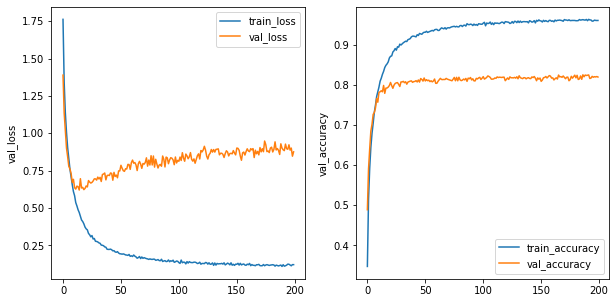

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=dfResult.loss, label='train_loss')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_loss, label='val_loss')
plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=dfResult.accuracy, label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_accuracy, label='val_accuracy')

一樣是有發生 overfitting，但時間亦有延後。

而且 dropout 讓 accuracy 提升到了 82%. 

In [0]:
print(f'The best val_accuracy is: {dfResult.val_accuracy.max()}')
print(f'The best train_accuracy is: {dfResult.accuracy.max()}')

The best val_accuracy is: 0.8255000114440918
The best train_accuracy is: 0.963824987411499


In [0]:
eloss, eacc = modelvgg.evaluate(x_test1, y_test1)
print(f'Loss(test): {eloss}')
print(f'Accuracy(test): {eacc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9182 - accuracy: 0.8180
Loss(test): 0.9181997179985046
Accuracy(test): 0.8180000185966492


## Dropout + L2

那 dropout 配合 L2 regularization 的影響為何？

In [0]:
modelvgg = Sequential()
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_IMG_SHAPE, kernel_regularizer=l2(L2)))
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same' , kernel_regularizer=l2(L2)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2)))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2)))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Flatten())
modelvgg.add(Dense(128, activation='relu'))
modelvgg.add(Dropout(0.4))
modelvgg.add(Dense(10, activation='softmax'))
modelvgg.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)         

In [0]:
opt = Adam(lr=LEARN_RATE)
modelvgg.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
h = modelvgg.fit(x_train1, y_train1, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

In [0]:
dfResult = pd.DataFrame(h.history)
dfResult.head()

,loss,accuracy,val_loss,val_accuracy
0,2.054308,0.268000,1.655621,0.3913
1,1.661664,0.405750,1.482684,0.4751
2,1.534387,0.462775,1.390989,0.5185
3,1.463119,0.493750,1.355674,0.5424
4,1.405929,0.516775,1.230275,0.5899


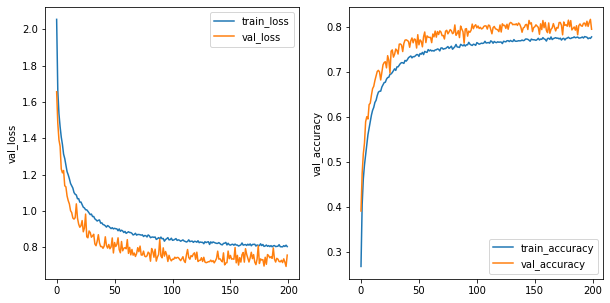

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=dfResult.loss, label='train_loss')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_loss, label='val_loss')
plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=dfResult.accuracy, label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_accuracy, label='val_accuracy')

可以看出 overfitting 的情況大大地改善了。

但也影響到了準確度

In [0]:
print(f'The best val_accuracy is: {dfResult.val_accuracy.max()}')
print(f'The best train_accuracy is: {dfResult.accuracy.max()}')

The best val_accuracy is: 0.8176000118255615
The best train_accuracy is: 0.7792750000953674


In [0]:
eloss, eacc = modelvgg.evaluate(x_test1, y_test1)
print(f'Loss(test): {eloss}')
print(f'Accuracy(test): {eacc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.7684 - accuracy: 0.7916
Loss(test): 0.7683835029602051
Accuracy(test): 0.7915999889373779


## Dropout + L2 + Data Arugumentaion

In [0]:
train_datagen = ImageDataGenerator(
    #rescale=1./255,  # 每一像素都做正規化
    #rotation_range=10,  #隨機將圖片轉動角度
    width_shift_range=0.1, #水平位移圖片
    height_shift_range=0.1, # 上下位移圖片
    #zoom_range=0.4, # 隨機將圖片放大
    #channel_shift_range=50, # 隨機修正圖片的顏色
    horizontal_flip=True, # 隨機水平翻轉圖片
    validation_split = 0.25 # 75% 的圖片會用來做訓練
)

In [0]:
train_generator = train_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, subset='training')

In [0]:
'''
val_datagen 則是會產生驗證集的資料。
驗證集的資料不需要做資料的變換，只要原封不動地把資料丟入模型，並驗證其準確率即可 
'''
val_datagen = ImageDataGenerator(
    #rescale=1./255,  # 每一像素都做正規化
    validation_split = 0.25
)

In [0]:
val_generator = val_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, subset='validation')

In [0]:
modelvgg = Sequential()
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_IMG_SHAPE, kernel_regularizer=l2(L2)))
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same' , kernel_regularizer=l2(L2)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2)))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2)))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2)))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Flatten())
modelvgg.add(Dense(128, activation='relu'))
modelvgg.add(Dropout(0.4))
modelvgg.add(Dense(10, activation='softmax'))
modelvgg.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)         

In [0]:
opt = Adam(lr=LEARN_RATE)
modelvgg.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
#h = modelvgg.fit(x_train1, y_train1, epochs=40, batch_size=512, validation_split=0.2)
h = modelvgg.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

In [0]:
dfResult = pd.DataFrame(h.history)
dfResult.head()

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=dfResult.loss, label='train_loss')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_loss, label='val_loss')
plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=dfResult.accuracy, label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_accuracy, label='val_accuracy')

In [0]:
print(f'The best val_accuracy is: {dfResult.val_accuracy.max()}')
print(f'The best train_accuracy is: {dfResult.accuracy.max()}')

In [0]:
eloss, eacc = modelvgg.evaluate(x_test1, y_test1)
print(f'Loss(test): {eloss}')
print(f'Accuracy(test): {eacc}')

## Dropout + Data Arugumentaion

In [0]:
train_datagen = ImageDataGenerator(
    #rescale=1./255,  # 每一像素都做正規化
    #rotation_range=10,  #隨機將圖片轉動角度
    width_shift_range=0.1, #水平位移圖片
    height_shift_range=0.1, # 上下位移圖片
    #zoom_range=0.4, # 隨機將圖片放大
    #channel_shift_range=50, # 隨機修正圖片的顏色
    horizontal_flip=True, # 隨機水平翻轉圖片
    validation_split = 0.25 # 75% 的圖片會用來做訓練
)

In [0]:
train_generator = train_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, subset='training')

In [0]:
'''
val_datagen 則是會產生驗證集的資料。
驗證集的資料不需要做資料的變換，只要原封不動地把資料丟入模型，並驗證其準確率即可 
'''
val_datagen = ImageDataGenerator(
    #rescale=1./255,  # 每一像素都做正規化
    validation_split = 0.25
)

In [0]:
val_generator = val_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, subset='validation')

In [0]:
modelvgg = Sequential()
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_IMG_SHAPE))
modelvgg.add(Conv2D(32, (3, 3), activation='relu', padding='same' ))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelvgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelvgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelvgg.add(MaxPooling2D((2, 2)))
modelvgg.add(Dropout(0.4))
modelvgg.add(Flatten())
modelvgg.add(Dense(128, activation='relu'))
modelvgg.add(Dropout(0.4))
modelvgg.add(Dense(10, activation='softmax'))
modelvgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
opt = Adam(lr=LEARN_RATE)
modelvgg.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
#h = modelvgg.fit(x_train1, y_train1, epochs=40, batch_size=512, validation_split=0.2)
h = modelvgg.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

In [0]:
dfResult = pd.DataFrame(h.history)
dfResult.head()

,loss,accuracy,val_loss,val_accuracy
0,1.983143,0.250853,1.650215,0.38888
1,1.614760,0.403387,1.417704,0.47192
2,1.437462,0.474027,1.268438,0.53936
3,1.346857,0.510560,1.178548,0.57296
4,1.254950,0.548107,1.088391,0.59944


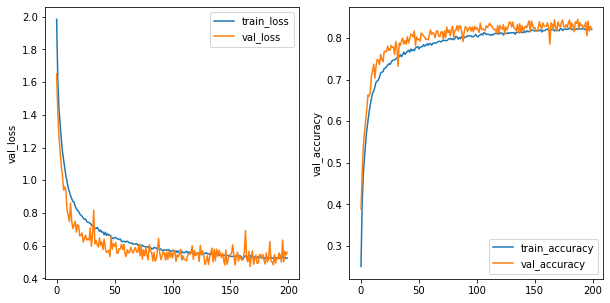

In [0]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=dfResult.loss, label='train_loss')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_loss, label='val_loss')
plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=dfResult.accuracy, label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=dfResult.val_accuracy, label='val_accuracy')

In [0]:
print(f'The best val_accuracy is: {dfResult.val_accuracy.max()}')
print(f'The best train_accuracy is: {dfResult.accuracy.max()}')

The best val_accuracy is: 0.8447200059890747
The best train_accuracy is: 0.8244533538818359


In [0]:
eloss, eacc = modelvgg.evaluate(x_test1, y_test1)
print(f'Loss(test): {eloss}')
print(f'Accuracy(test): {eacc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.5951 - accuracy: 0.8168
Loss(test): 0.5951389670372009
Accuracy(test): 0.8167999982833862
